In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#problemas de saúde em fetos

In [3]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

In [6]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [8]:
y.value_counts() /y.shape[0]

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)

In [15]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [16]:
#score multiclasse
rf.predict_proba(X_ts )


array([[0.99097601, 0.00797676, 0.00104723],
       [0.87880691, 0.08948189, 0.0317112 ],
       [0.92801066, 0.06963011, 0.00235923],
       ...,
       [0.96200756, 0.02110306, 0.01688938],
       [0.01744346, 0.20090025, 0.78165629],
       [0.9830388 , 0.01320399, 0.00375722]])

In [17]:
pd.DataFrame(rf.predict_proba(X_ts), columns =[
    'Saudável',
    'Suspeito',
    'Doente'    
])

,Saudável,Suspeito,Doente
0,0.990976,0.007977,0.001047
1,0.878807,0.089482,0.031711
2,0.928011,0.069630,0.002359
3,0.642509,0.344829,0.012662
4,0.994743,0.004568,0.000689
...,...,...,...
633,0.686698,0.291111,0.022191
634,0.992154,0.007074,0.000772
635,0.962008,0.021103,0.016889
636,0.017443,0.200900,0.781656


In [19]:
#one vs others  viiixe >0.9, suspeito(?)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==1, rf.predict_proba(X_ts)[:,0])

0.9841662760721819

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==2, rf.predict_proba(X_ts)[:,1])

0.9756496415770609

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==3, rf.predict_proba(X_ts)[:,])

0.9973919980363279

Text(0.5, 1.0, 'Score saudável')

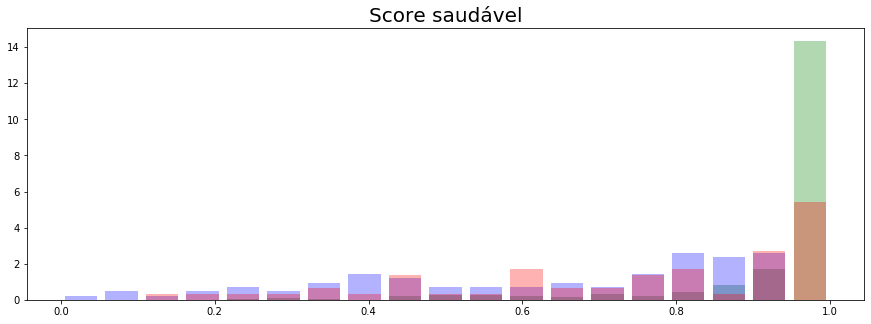

In [29]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel [y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_saudavel [y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_saudavel [y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score saudável', fontsize=20)

Text(0.5, 1.0, 'Score suspeito')

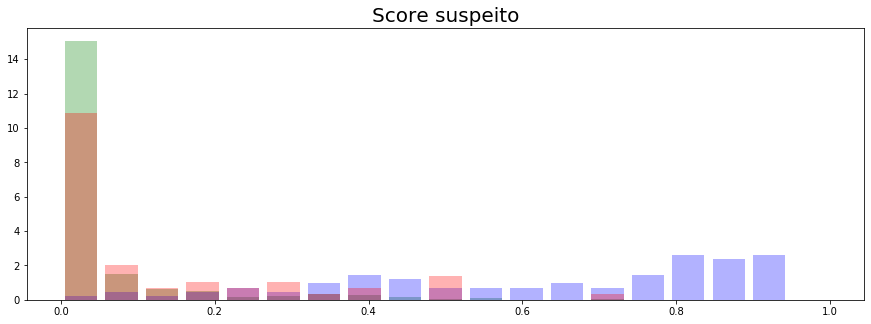

In [30]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_suspeito [y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito [y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito [y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score suspeito', fontsize=20)

Text(0.5, 1.0, 'Score doente')

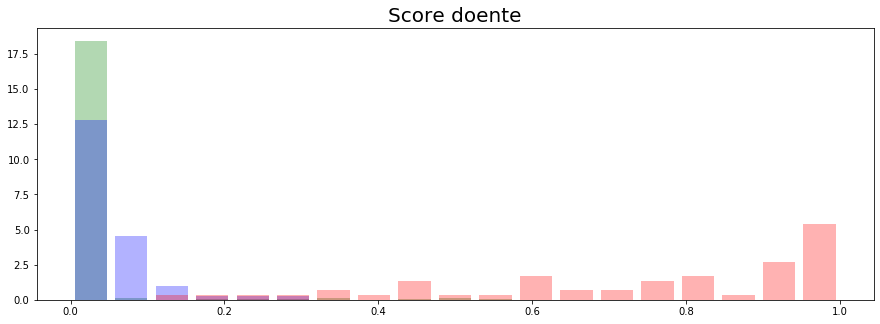

In [32]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_doente [y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_doente [y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente [y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score doente', fontsize=20)

Text(0.5, 1.0, 'Publico Saudável')

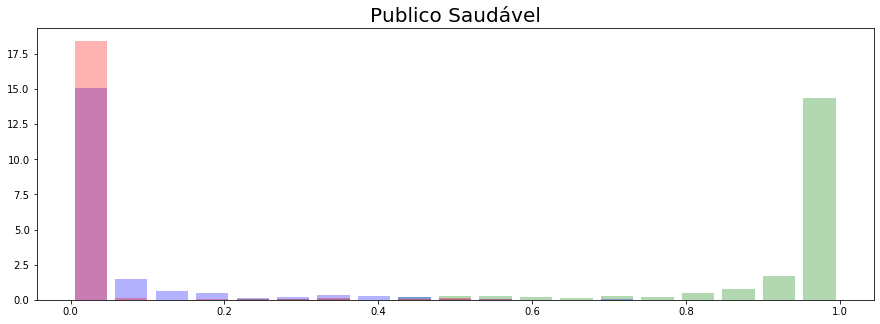

In [33]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel [y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito [y_ts==1], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente [y_ts==1], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Publico Saudável', fontsize=20)

Text(0.5, 1.0, 'Publico Suspeito')

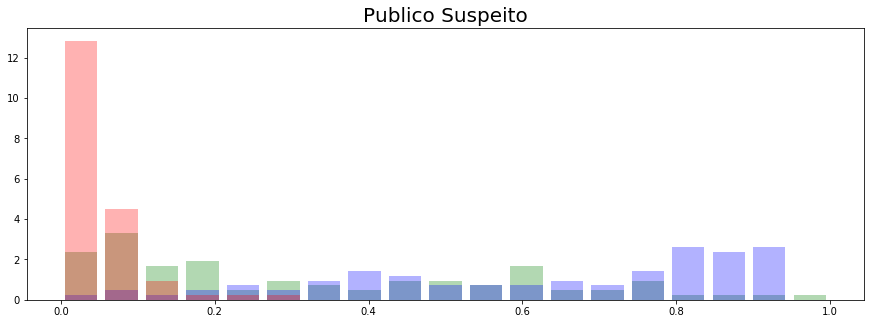

In [34]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel [y_ts==2], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito [y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente [y_ts==2], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Publico Suspeito', fontsize=20)

In [ ]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel [y_ts==3], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito [y_ts==3], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente [y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Publico Doente', fontsize=20)